# Multi-Class Prediction of Insulin Dosage Recommendation Evaluated from Patient Health Data

In [1]:
# importng the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Versions of the packages used :
# verified to create a local env
# np.__version__
# pd.__version__
# matplotlib.__version__
# sns.__version__
# sklearn.__version__
# xgboost.__version__

In [3]:
# importing patient health data

pathealth_df = pd.read_csv('data/insulin_dosage_prediction.csv')

pathealth_df

,patient_id,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine,Insulin
0,1,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady
1,2,female,57,yes,113.35,6.67,high,insulin,19.10,11.66,114.93,1.35,8.60,1.08,up
2,3,male,24,yes,127.40,4.14,medium,oral,22.48,5.72,59.07,0.96,5.19,1.36,up
3,4,male,49,yes,138.79,6.80,medium,oral,31.67,11.91,50.81,0.61,4.79,1.23,up
4,5,male,65,no,128.42,4.01,low,insulin,28.50,5.72,65.95,1.16,7.68,0.62,steady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,female,33,no,193.35,6.40,high,none,29.20,4.74,61.66,1.33,6.18,0.58,no
9996,9997,male,77,yes,140.01,2.28,low,none,34.41,4.93,66.62,0.84,6.74,0.74,up
9997,9998,female,71,yes,190.90,8.53,medium,oral,26.82,9.64,76.26,1.47,9.71,0.67,steady
9998,9999,female,33,yes,164.27,7.50,high,none,29.82,9.34,94.50,1.04,8.49,0.96,no


In [4]:
# overview of the df
pathealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            10000 non-null  int64  
 1   gender                10000 non-null  object 
 2   age                   10000 non-null  int64  
 3   family_history        10000 non-null  object 
 4   glucose_level         10000 non-null  float64
 5   physical_activity     10000 non-null  float64
 6   food_intake           10000 non-null  object 
 7   previous_medications  10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   HbA1c                 10000 non-null  float64
 10  weight                10000 non-null  float64
 11  insulin_sensitivity   10000 non-null  float64
 12  sleep_hours           10000 non-null  float64
 13  creatinine            10000 non-null  float64
 14  Insulin               10000 non-null  object 
dtypes: float64(8), int64

In [5]:
# basic stats of the patient health df
pathealth_df.describe(include='all')

,patient_id,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine,Insulin
count,10000.00000,10000,10000.000000,10000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,2,NaN,2,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,male,NaN,no,NaN,NaN,low,none,NaN,NaN,NaN,NaN,NaN,NaN,steady
freq,NaN,5013,NaN,5025,NaN,NaN,3363,2529,NaN,NaN,NaN,NaN,NaN,NaN,5326
mean,5000.50000,NaN,48.332600,NaN,136.130545,4.957276,NaN,NaN,29.100394,8.038930,79.684362,1.002086,6.990714,1.002028,NaN
std,2886.89568,NaN,17.908044,NaN,37.477472,2.862755,NaN,NaN,6.329743,2.324137,23.198076,0.287446,1.724606,0.288162,NaN
min,1.00000,NaN,18.000000,NaN,70.010000,0.000000,NaN,NaN,18.000000,4.000000,40.010000,0.500000,4.000000,0.500000,NaN
25%,2500.75000,NaN,33.000000,NaN,104.047500,2.470000,NaN,NaN,23.650000,6.040000,59.702500,0.750000,5.480000,0.750000,NaN
50%,5000.50000,NaN,48.000000,NaN,136.835000,4.960000,NaN,NaN,29.115000,8.010000,79.335000,1.000000,7.010000,1.010000,NaN
75%,7500.25000,NaN,64.000000,NaN,168.020000,7.380000,NaN,NaN,34.620000,10.100000,99.740000,1.250000,8.470000,1.250000,NaN


In [6]:
# converting column inames into lowercase for easy reference
# since all columns are string types
pathealth_df.columns = pathealth_df.columns.str.lower()

pathealth_df.head(1)

,patient_id,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,bmi,hba1c,weight,insulin_sensitivity,sleep_hours,creatinine,insulin
0,1,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady


In [7]:
# checking null values
pathealth_df.isnull().sum()

patient_id              0
gender                  0
age                     0
family_history          0
glucose_level           0
physical_activity       0
food_intake             0
previous_medications    0
bmi                     0
hba1c                   0
weight                  0
insulin_sensitivity     0
sleep_hours             0
creatinine              0
insulin                 0
dtype: int64

In [8]:
# checking for duplicates
print('num of duplicate records:', int(pathealth_df.duplicated().sum()))

num of duplicate records: 0


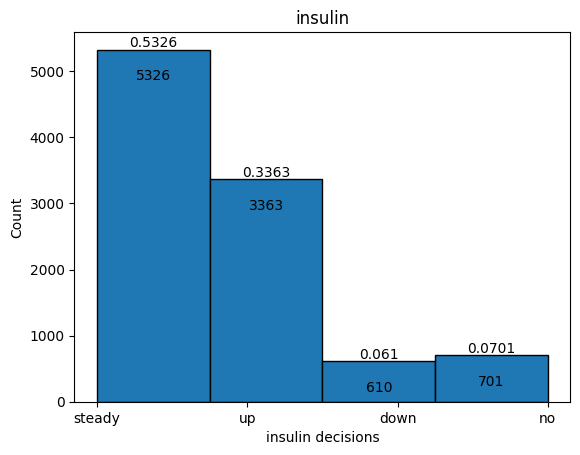

In [9]:
# distribution of the target variable

# plotting the labels
counts, bins, patches = plt.hist(pathealth_df['insulin'], bins=len(pathealth_df['insulin'].unique()), edgecolor='black')

# plot the labels
bin_width = bins[1] - bins[0]

for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + bin_width/2, count-500, str(int(count)), ha='center', va='bottom')
        plt.text(bin_edge + bin_width/2, count, str(count/len(pathealth_df['insulin'])), ha='center', va='bottom')


plt.title('insulin')
plt.xlabel('insulin decisions')
plt.ylabel('Count')

plt.show()

In [10]:
pathealth_df['insulin'].value_counts()

insulin
steady    5326
up        3363
no         701
down       610
Name: count, dtype: int64

The dataset is heavily imbalanced based on the target variable "insulin"

The scope of this project is only to identify if insulin needs to be increased (up) or kept the same (steady)

As per the scope, we can drop the records with other categories

In [11]:
# dropping unwanted target variables
pathealth_df.drop(pathealth_df[pathealth_df['insulin'].isin(['no', 'down'])].index, inplace=True)

In [12]:
# checking the modified dataframe
print(pathealth_df.shape)

display(pathealth_df.head(3))

display(pathealth_df['insulin'].value_counts())

(8689, 15)


,patient_id,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,bmi,hba1c,weight,insulin_sensitivity,sleep_hours,creatinine,insulin
0,1,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady
1,2,female,57,yes,113.35,6.67,high,insulin,19.10,11.66,114.93,1.35,8.60,1.08,up
2,3,male,24,yes,127.40,4.14,medium,oral,22.48,5.72,59.07,0.96,5.19,1.36,up


insulin
steady    5326
up        3363
Name: count, dtype: int64

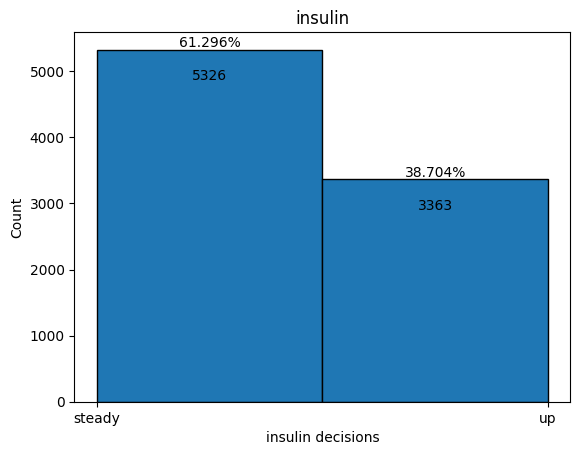

In [13]:
# distribution of the target variable after modifying the dataframe

# plotting the labels
counts, bins, patches = plt.hist(pathealth_df['insulin'], bins=len(pathealth_df['insulin'].unique()), edgecolor='black')

# plot the labels
bin_width = bins[1] - bins[0]

for count, bin_edge in zip(counts, bins):
    if count > 0:
        plt.text(bin_edge + bin_width/2, count-500, str(int(count)), ha='center', va='bottom')
        plt.text(bin_edge + bin_width/2, count, str(round(count/len(pathealth_df['insulin'])*100,3))+'%', ha='center', va='bottom')


plt.title('insulin')
plt.xlabel('insulin decisions')
plt.ylabel('Count')

plt.show()

In [14]:
# does the patient id recur?
int((pathealth_df['patient_id'].value_counts() > 2).sum())

0

In [15]:
# the patient id does not recur
# so in no way the patient id is useful
# drop the patient id column as it is an un important feature
pathealth_df.drop('patient_id', axis=1, inplace=True)

pathealth_df.columns

Index(['gender', 'age', 'family_history', 'glucose_level', 'physical_activity',
       'food_intake', 'previous_medications', 'bmi', 'hba1c', 'weight',
       'insulin_sensitivity', 'sleep_hours', 'creatinine', 'insulin'],
      dtype='object')